Papers de referencia:

Causality for Machine Learning - Bernhard Schölkopf (https://arxiv.org/abs/1911.10500)

In [1]:
import numpy as np
import pandas as pd

n_samples = 100
np.random.seed(42)
ages = np.random.randint(20, 50, n_samples)
hours = np.random.randint(1, 5, n_samples) + np.random.randn(n_samples)
p = 10 + 0.5 * ages  -2 * hours + np.random.randn(n_samples) *  2
under_50 = pd.DataFrame({'age': ages, 'Hours Exercised': hours, 'probability': p})

n_samples = 100
ages = np.random.randint(50, 85, n_samples)
hours = np.random.randint(3, 8, n_samples) + np.random.randn(n_samples) * 0.5
p = 15 + 0.5 * ages -2 * hours + np.random.randn(n_samples) 
over_50 = pd.DataFrame({'age': ages, 'Hours Exercised': hours, 'probability': p})

Text(0, 0.5, 'Probability of Heart Attack')

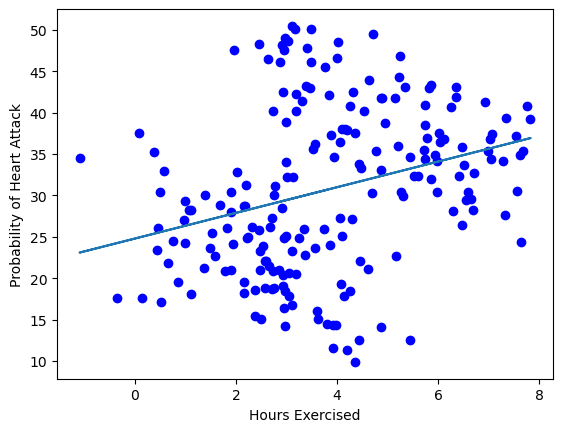

In [2]:
from turtle import color
import matplotlib.pyplot as plt
plt.scatter(under_50['Hours Exercised'], under_50['probability'], label='under 50', color='blue')
plt.scatter(over_50['Hours Exercised'], over_50['probability'], label='over 50', color='blue')

all_ages = pd.concat([under_50, over_50])

m, b = np.polyfit(all_ages['Hours Exercised'], all_ages["probability"], 1)
plt.plot(all_ages['Hours Exercised'], m*all_ages['Hours Exercised']+b)

#show axis labels
plt.xlabel('Hours Exercised')
plt.ylabel('Probability of Heart Attack')

Text(0, 0.5, 'Probability of Heart Attack')

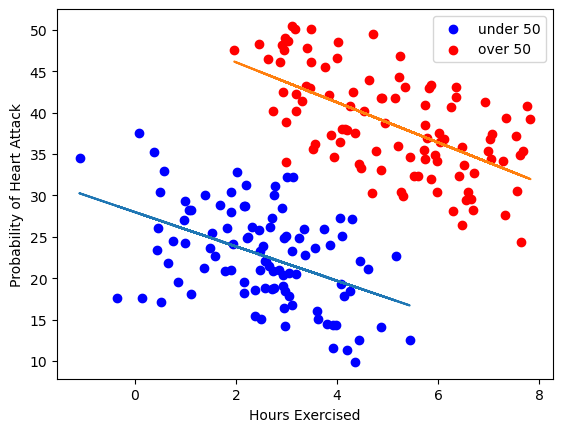

In [3]:
m1, b1 = np.polyfit(under_50['Hours Exercised'], under_50["probability"], 1)
plt.plot(under_50['Hours Exercised'], m1*under_50['Hours Exercised']+b1)

m2, b2 = np.polyfit(over_50['Hours Exercised'], over_50["probability"], 1)
plt.plot(over_50['Hours Exercised'], m2*over_50['Hours Exercised']+b2)

plt.scatter(under_50['Hours Exercised'], under_50['probability'], label='under 50', color='blue')
plt.scatter(over_50['Hours Exercised'], over_50['probability'], label='over 50', color='red')

#show legend
plt.legend()

#show axis labels
plt.xlabel('Hours Exercised')
plt.ylabel('Probability of Heart Attack')


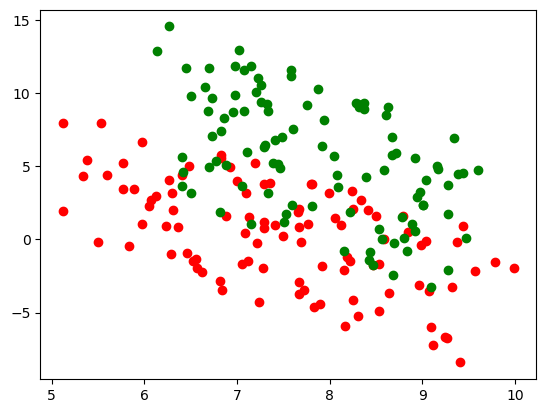

In [4]:
x1 = np.random.randint(1, 50, 100)
z1 = np.random.randint(6, 10, 100)  + np.random.randn(100) * 0.5

y1 = 0.2 * x1 + (-2 * z1) + 10
plt.scatter(z1, y1, color='red')

x2 = np.random.randint(1, 60, 100)
z2 = np.random.randint(7, 10, 100) + np.random.randn(100) * 0.5

y2 = 0.2 * x2 + (-2.4 * z2) + 18
plt.scatter(z2, y2, color='green')

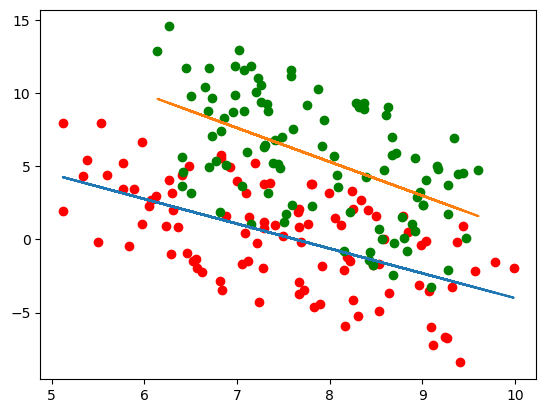

In [5]:
# regression line
m1, b1 = np.polyfit(z1, y1, 1)
plt.plot(z1, m1*z1+b1)

m2, b2 = np.polyfit(z2, y2, 1)
plt.plot(z2, m2*z2+b2)

plt.scatter(z1, y1, color='red', label='regression line')
plt.scatter(z2, y2, color='green', label='regression line')

